In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/signapoop/Desktop/fyp-graph-clustering'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import pickle 
import numpy as np
import pandas as pd
import torch
import os
from timeit import default_timer as timer
import networkx as nx
import scipy.sparse as sp
from sklearn.manifold import TSNE

In [3]:
from core.EmbeddingDataSet import EmbeddingDataSet
from core.GraphDataBlock import GraphDataBlock
from util.plot_graph_embedding import plot_graph_embedding
from util.evaluation_metrics import evaluate_viz_metrics, trustworthiness, neighborhood_preservation
from util.io_utils import unpack_deepwalk_embedding

In [4]:
if torch.cuda.is_available():
    dtypeFloat = torch.cuda.FloatTensor
    dtypeLong = torch.cuda.LongTensor
    print('cuda available')
    device = 'cuda'
else:
    dtypeFloat = torch.FloatTensor
    dtypeLong = torch.LongTensor
    print('cuda not available')
    device = 'cpu'

cuda not available


In [5]:
dataset_str = 'cora'

In [6]:
dataset_name = '{}_second_test'.format(dataset_str)
parent_dir = os.path.abspath('..')
input_dir = os.path.join(parent_dir, 'data')
dataset = EmbeddingDataSet(dataset_name, input_dir, train=True)
dataset.create_all_data(n_batches=1, shuffle=False)
dataset.summarise()

Data blocks of length:  [2708]
Time to create all data (s) = 0.0515
Name of dataset = cora_second_test
Input dimension = 1433
Number of training samples = 2708
Training labels = True


In [7]:
net_parameters = {}
net_parameters['n_components'] = 2
net_parameters['D'] = dataset.input_dim # input dimension
net_parameters['L'] = 2 # number of hidden layers

In [8]:
dataset = EmbeddingDataSet(dataset_name, input_dir, train=True)
dataset.create_all_data(n_batches=1, shuffle=False)

Data blocks of length:  [2708]
Time to create all data (s) = 0.0207


## End of boilerplate code

In [9]:
data_dir = os.path.join(input_dir, '{}_full'.format(dataset_str))

In [10]:
y_deepwalk_2 = unpack_deepwalk_embedding(os.path.join(data_dir, '{}_2.embeddings'.format(dataset_str)))

Embedding matrix shape:  (2708, 2)


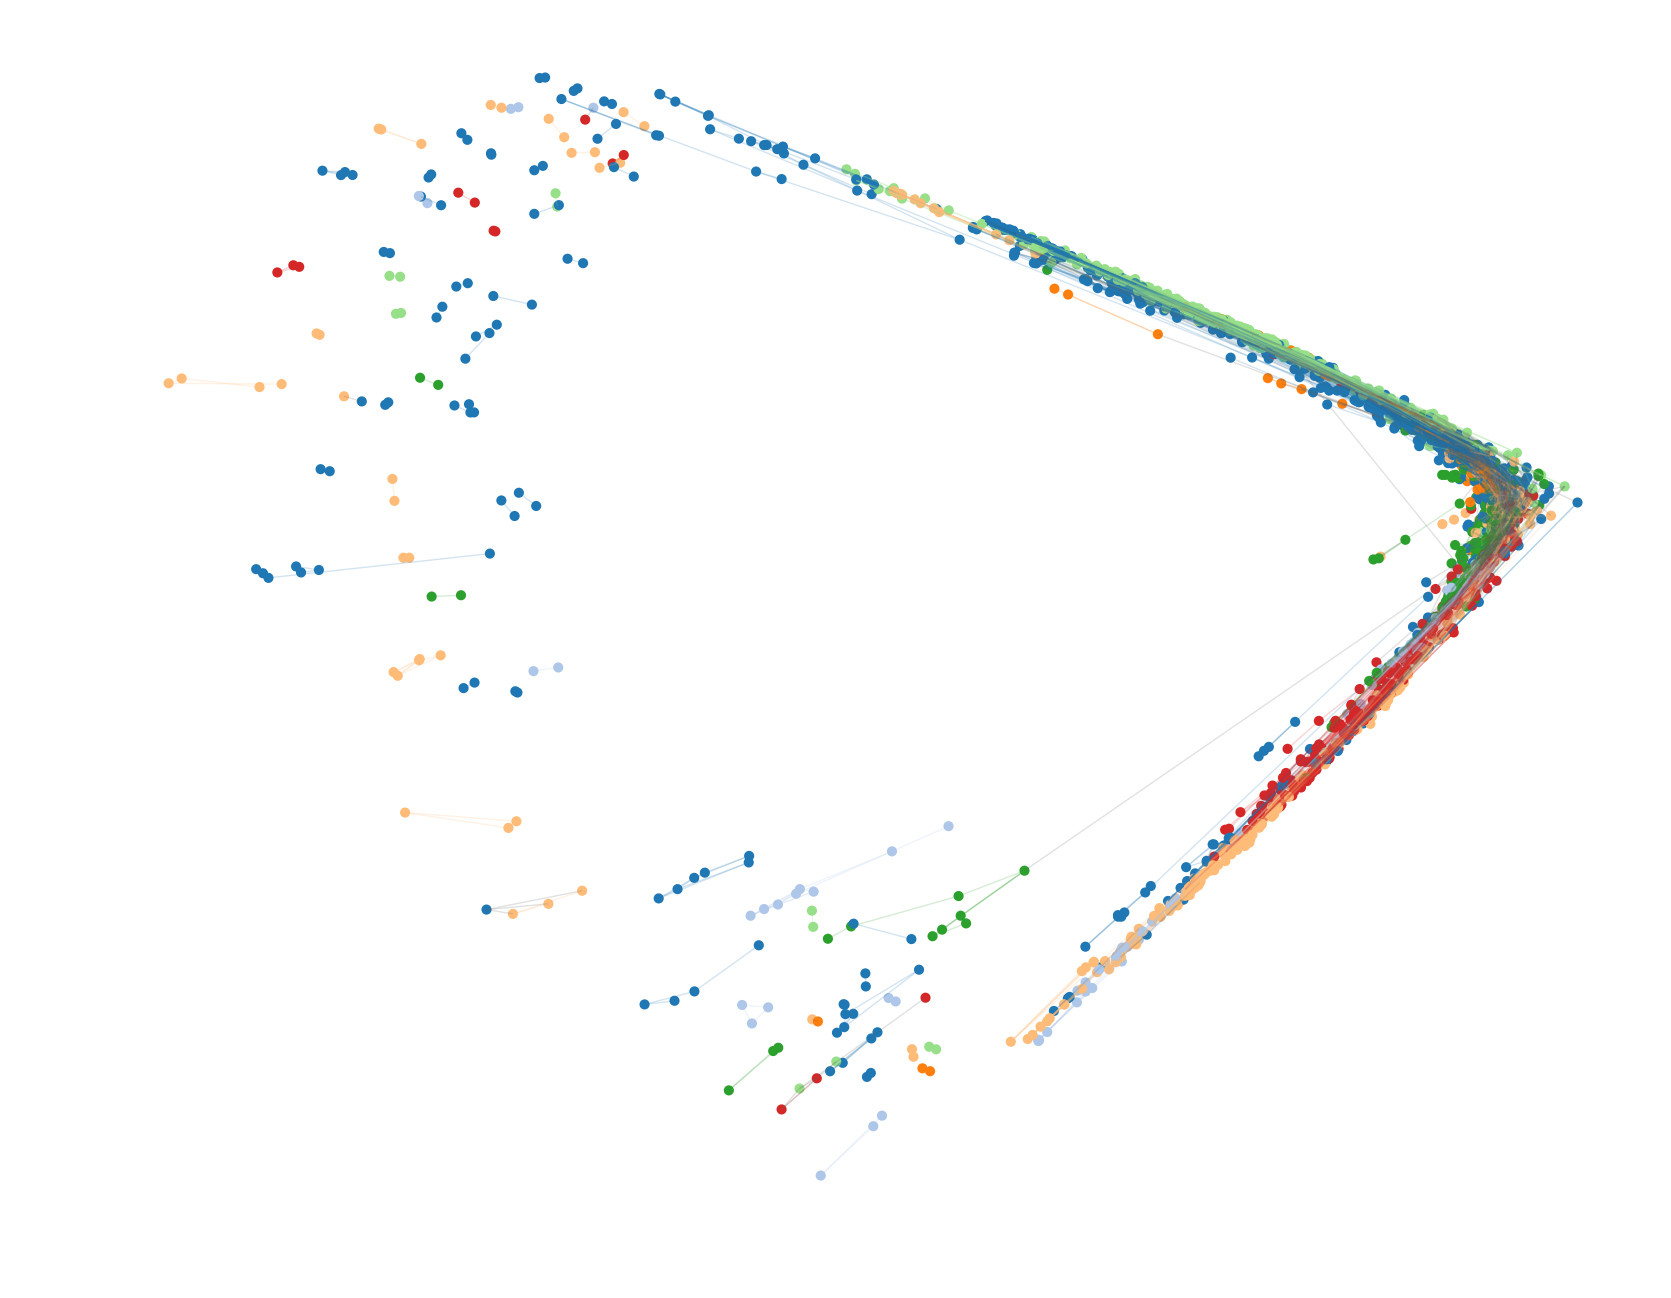

In [11]:
plot_graph_embedding(y_deepwalk_2, dataset.labels, dataset.adj_matrix, line_alpha=0.1)

In [12]:
y_deepwalk_128 = unpack_deepwalk_embedding(os.path.join(data_dir, '{}_128.embeddings'.format(dataset_str)))

Embedding matrix shape:  (2708, 128)


In [13]:
embedder = TSNE(n_components=2, perplexity=30, verbose=1)
y_pred_tsne = embedder.fit_transform(y_deepwalk_128)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2708 samples in 0.009s...
[t-SNE] Computed neighbors for 2708 samples in 1.637s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2708
[t-SNE] Computed conditional probabilities for sample 2000 / 2708
[t-SNE] Computed conditional probabilities for sample 2708 / 2708
[t-SNE] Mean sigma: 2.171089
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.163773
[t-SNE] KL divergence after 1000 iterations: 1.011021


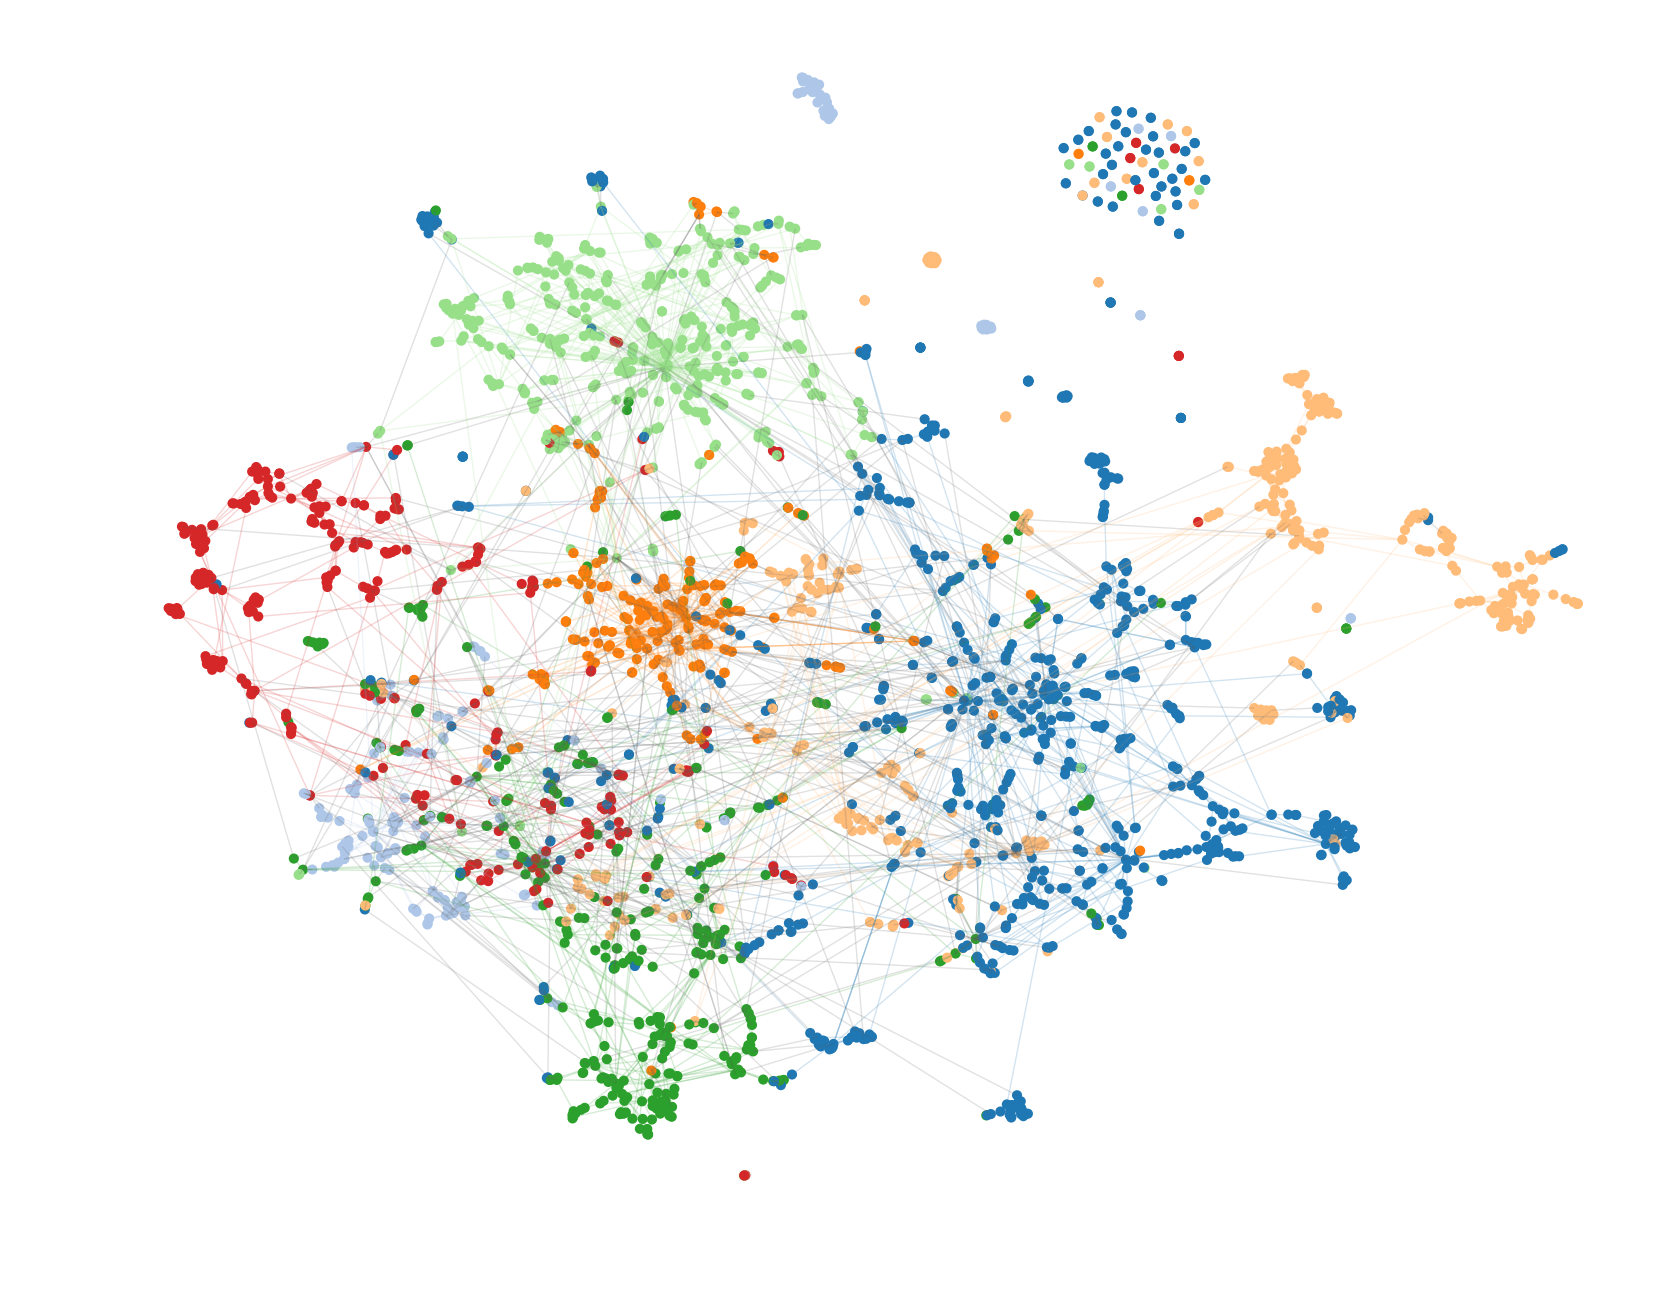

In [14]:
plot_graph_embedding(y_pred_tsne, dataset.labels, dataset.adj_matrix, line_alpha=0.1)

In [15]:
from scipy.sparse.csgraph import connected_components

In [16]:
n_connected, _ = connected_components(dataset.adj_matrix)
n_connected

78

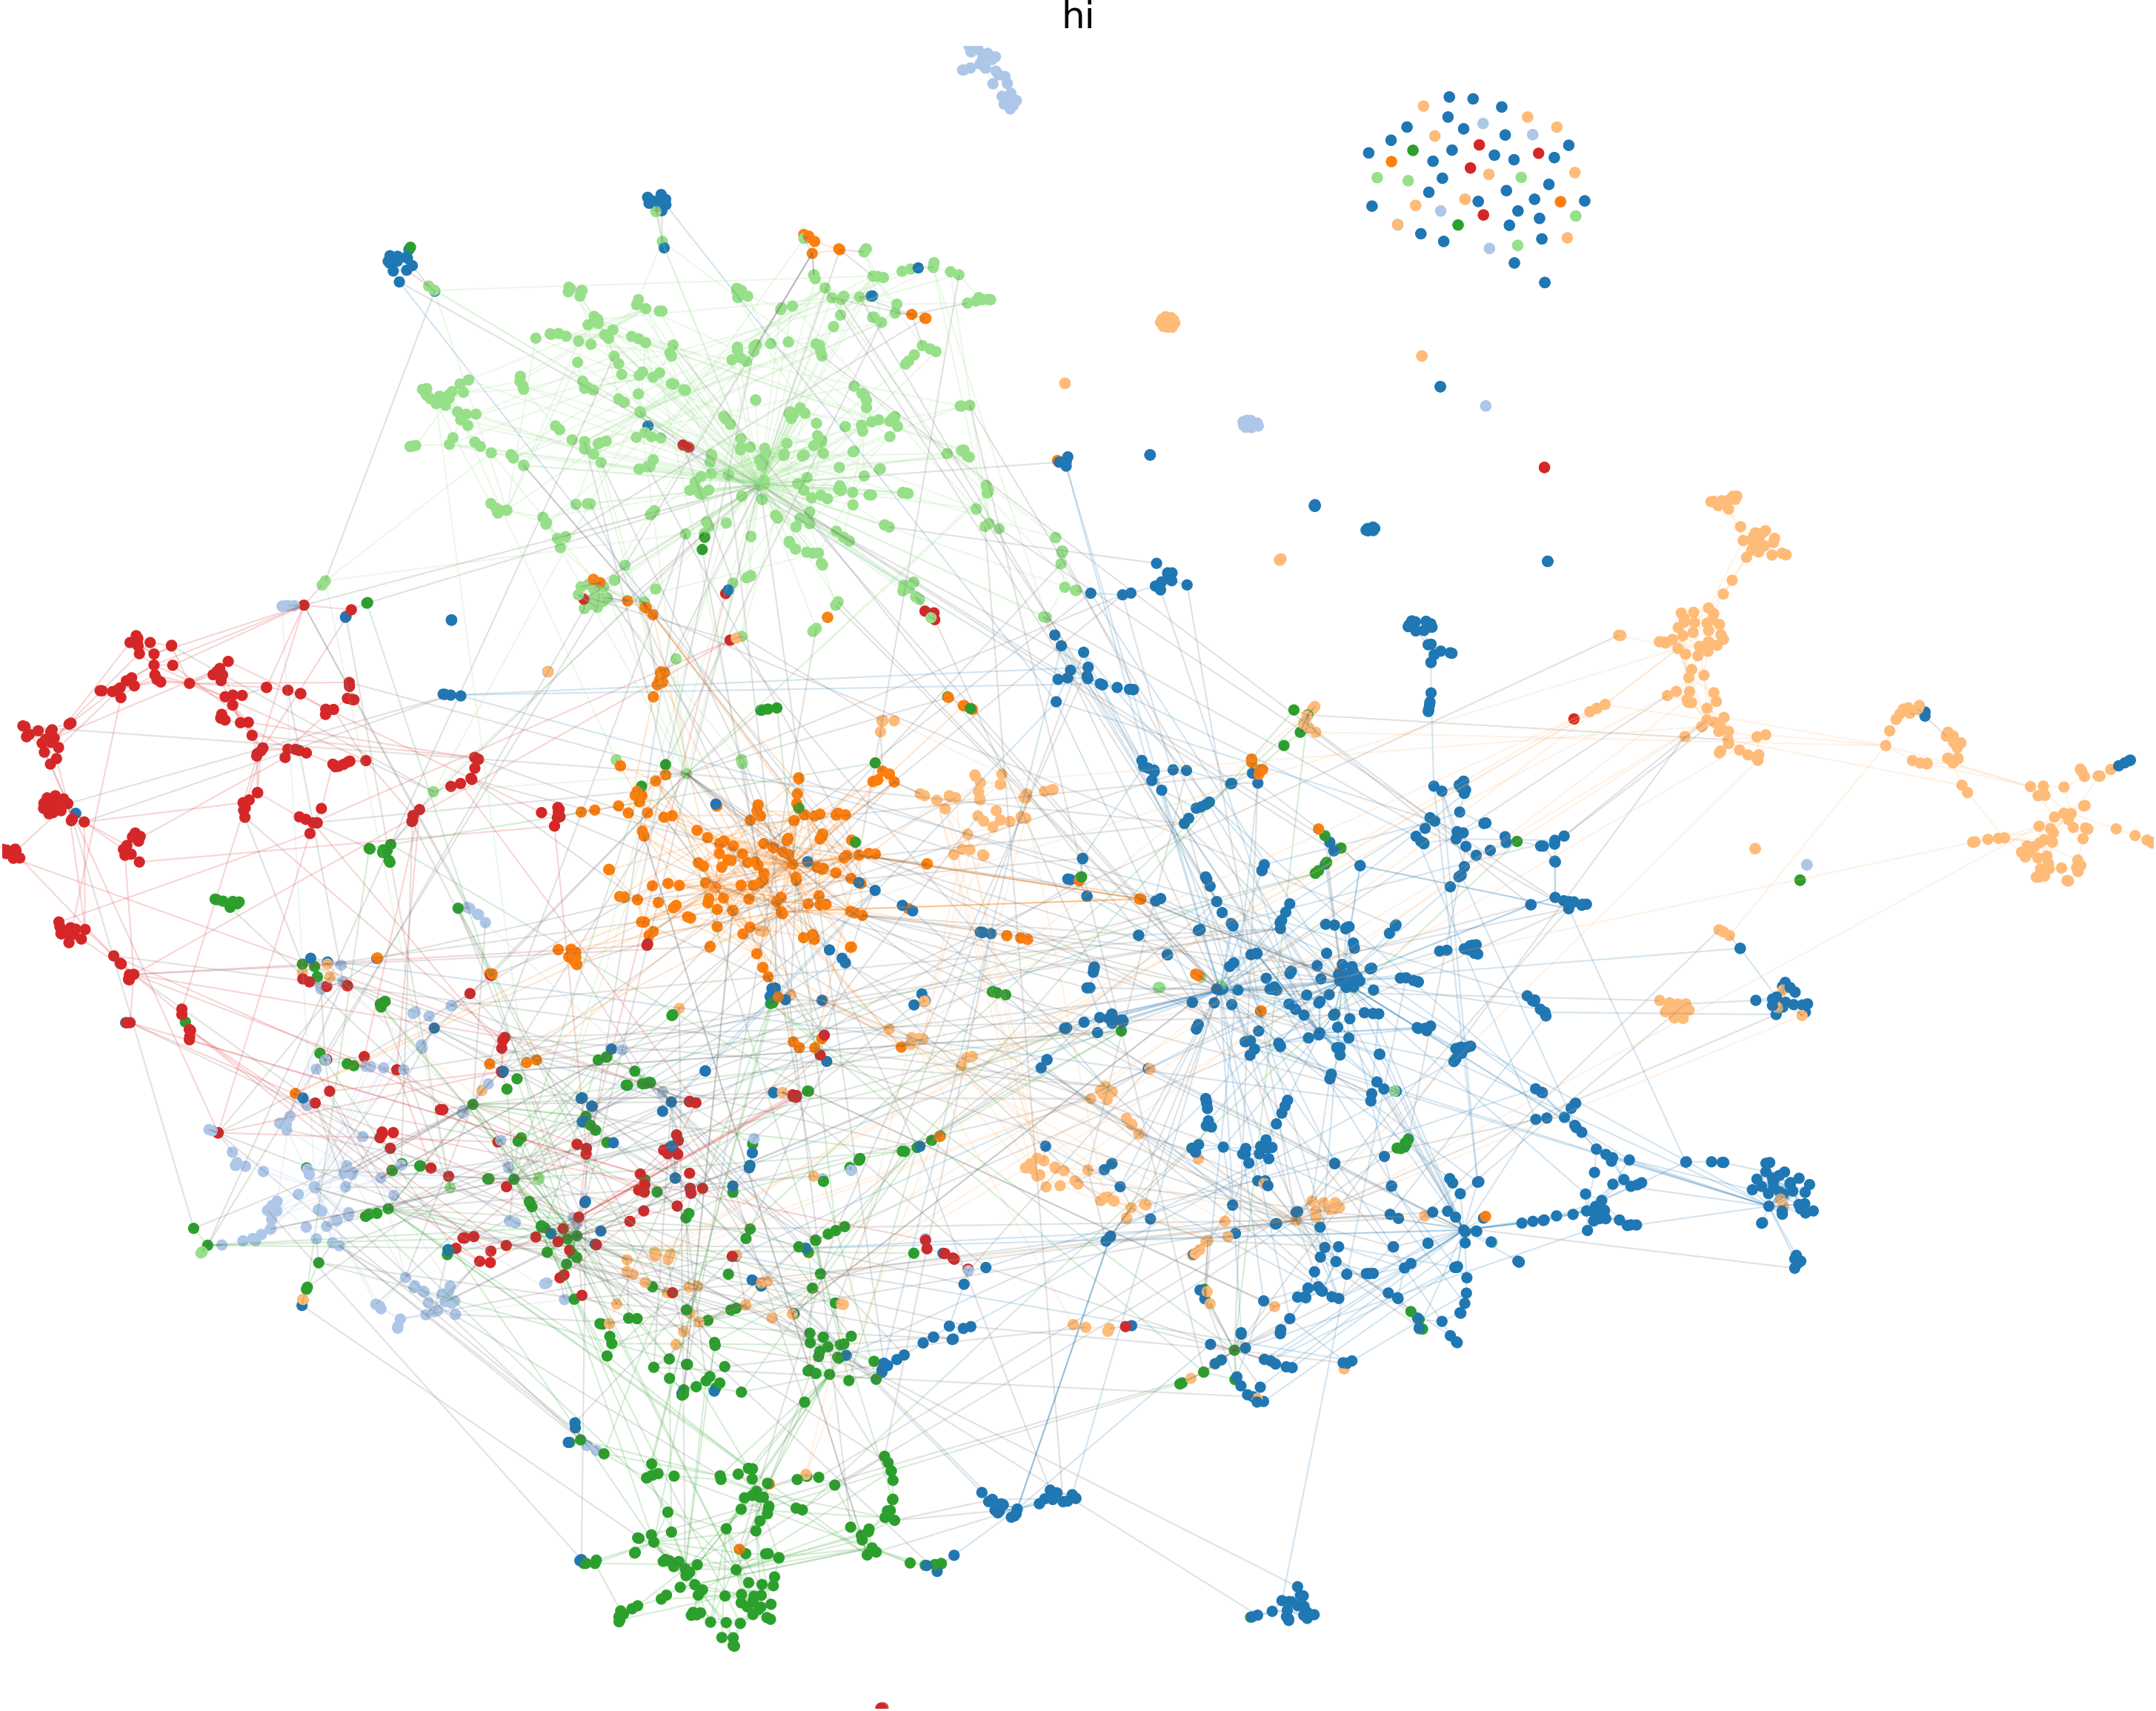

In [63]:
plot_graph_embedding(y_pred_tsne, dataset.labels, dataset.adj_matrix, line_alpha=0.1)